# Explore here

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Leer el archivo 
datos = pd.read_csv('/workspaces/ML/data/raw/datos.csv')
# Mostrar los datos
print(datos.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [29]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [30]:
datos.shape

(41188, 21)

In [31]:
datos.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
41183    False
41184    False
41185    False
41186    False
41187    False
Length: 41188, dtype: bool

In [32]:
datos.drop_duplicates

<bound method DataFrame.drop_duplicates of        age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

        

In [33]:
datos.isnull().sum().sort_values(ascending = False)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [34]:
# Separar en dos variables númericas y categóricas

Variables_objeto = datos.select_dtypes(include=['object']).columns.tolist()
Variable_numericas = datos.select_dtypes(include=['number']).columns.tolist()

print("variables Categoricas:", Variables_objeto)
print("variables Numericas:", Variable_numericas)

variables Categoricas: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
variables Numericas: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


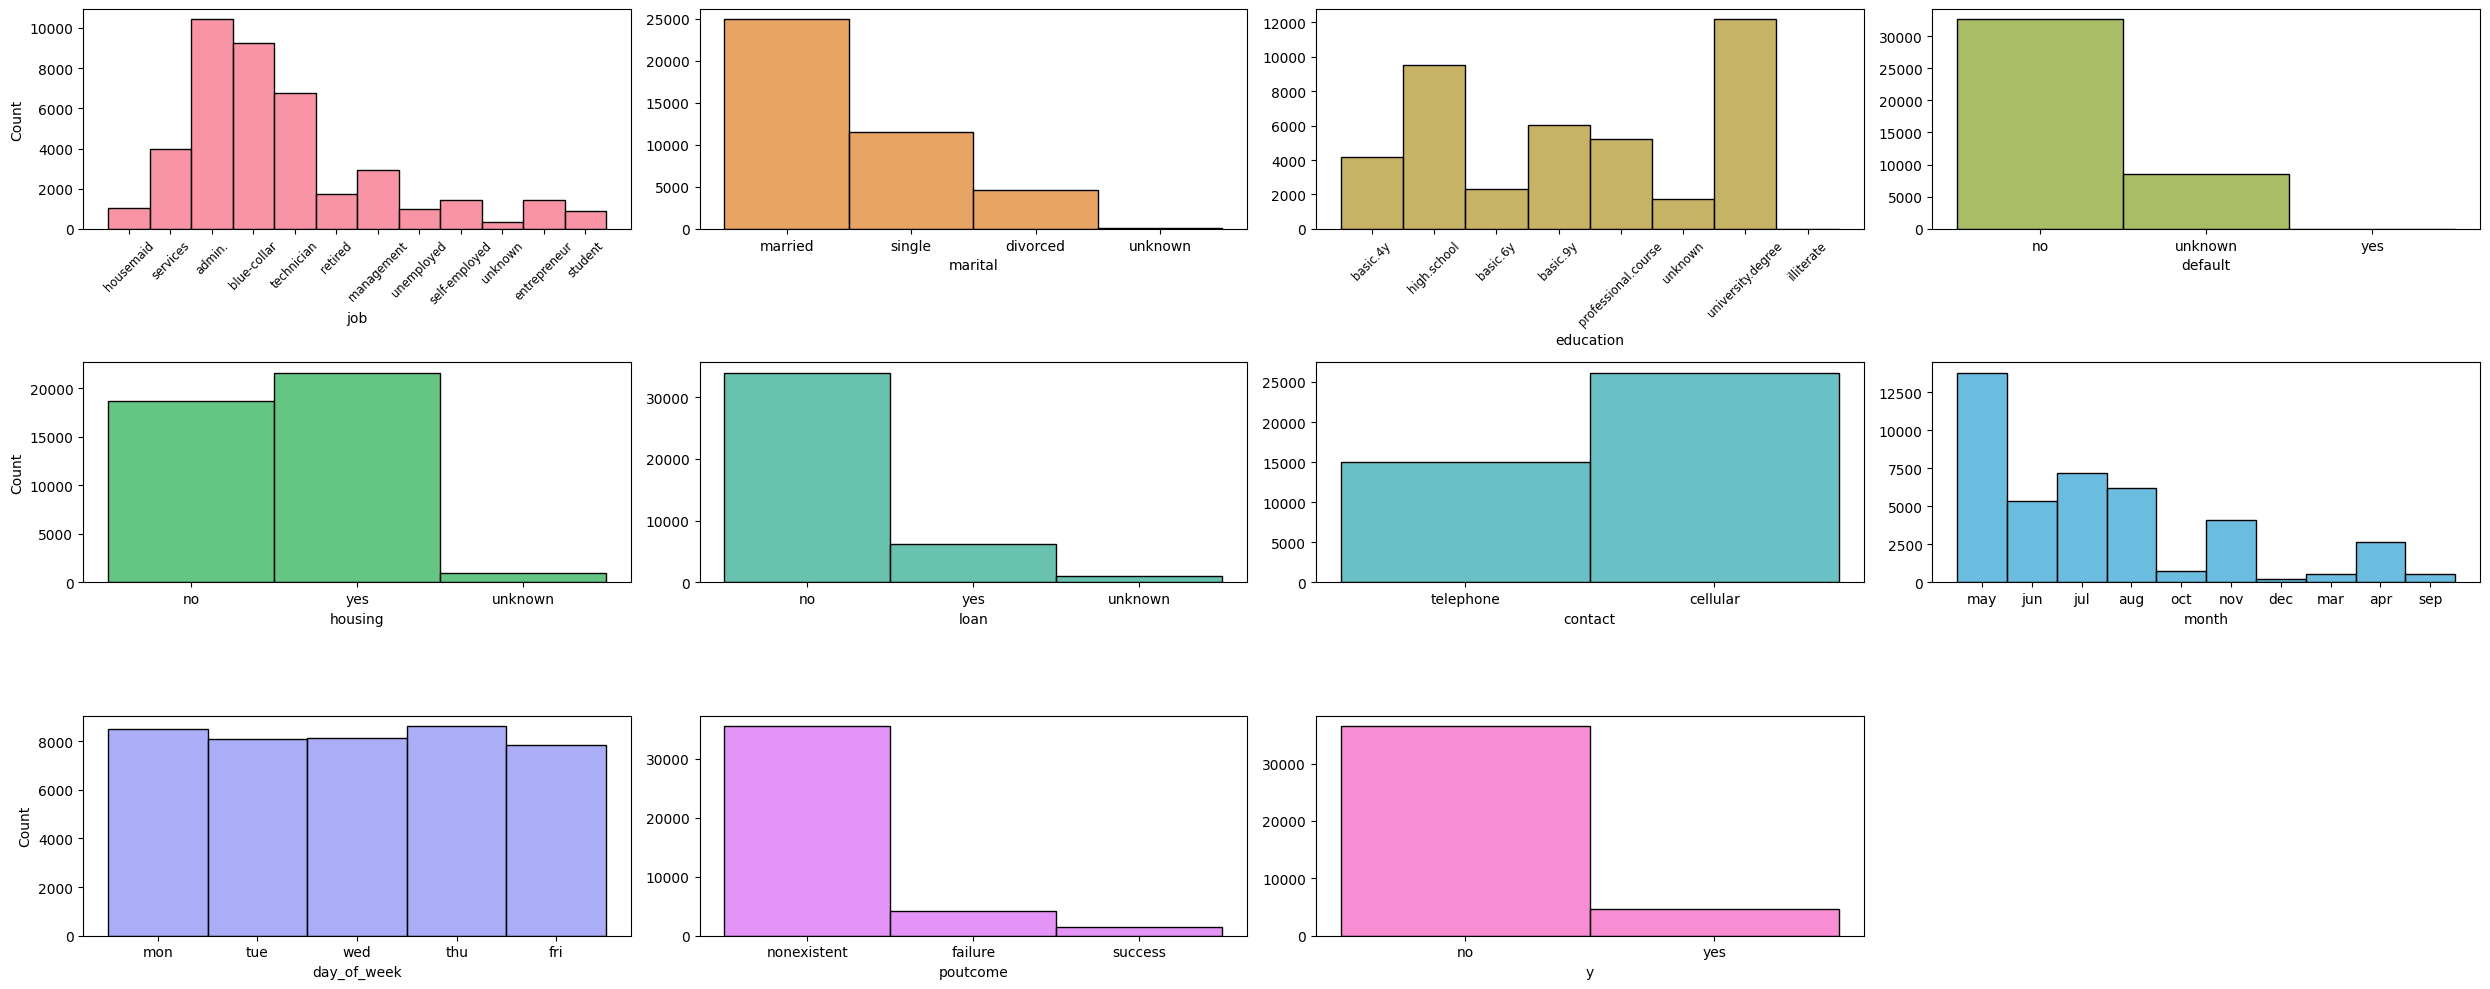

In [35]:
# Univariate Analysis:
# Histograms for categorical variables.
# Categorical variables: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

colors = sns.color_palette("husl", 11)  

fig, axes = plt.subplots(3, 4, figsize=(25, 10))

sns.histplot(ax=axes[0,0], data=datos, x='job', color=colors[0])
axes[0,0].tick_params(axis='x', rotation=45, labelsize='small')
sns.histplot(ax=axes[0,1], data=datos, x='marital', color=colors[1]).set(ylabel=None)
sns.histplot(ax=axes[0,2], data=datos, x='education', color=colors[2]).set(ylabel=None)
axes[0,2].tick_params(axis='x', rotation=45, labelsize='small')
sns.histplot(ax=axes[0,3], data=datos, x='default', color=colors[3]).set(ylabel=None)

sns.histplot(ax=axes[1,0], data=datos, x='housing', color=colors[4])
sns.histplot(ax=axes[1,1], data=datos, x='loan', color=colors[5]).set(ylabel=None)
sns.histplot(ax=axes[1,2], data=datos, x='contact', color=colors[6]).set(ylabel=None)
sns.histplot(ax=axes[1,3], data=datos, x='month', color=colors[7]).set(ylabel=None)

sns.histplot(ax=axes[2,0], data=datos, x='day_of_week', color=colors[8])
sns.histplot(ax=axes[2,1], data=datos, x='poutcome', color=colors[9]).set(ylabel=None)
sns.histplot(ax=axes[2,2], data=datos, x='y', color=colors[10]).set(ylabel=None)
fig.delaxes(axes[2,3])

plt.tight_layout()

plt.show()


In [36]:
# Grupos dentro de la categoria de "jobs"
job_types = datos['job'].value_counts()
percent_jobs = (job_types / len(datos['job'])).round(3) * 100
print(percent_jobs)

job
admin.           25.3
blue-collar      22.5
technician       16.4
services          9.6
management        7.1
retired           4.2
entrepreneur      3.5
self-employed     3.5
housemaid         2.6
unemployed        2.5
student           2.1
unknown           0.8
Name: count, dtype: float64


In [37]:
# Grupos dentro de la categoriaa de 'marital'
marital_types = datos['marital'].value_counts()
percent_marital = (marital_types / len(datos['marital'])).round(3) * 100
print(percent_marital)

marital
married     60.5
single      28.1
divorced    11.2
unknown      0.2
Name: count, dtype: float64


In [38]:
# Grupos dentro de la categoriaa de 'education'
education_types = datos['education'].value_counts()
percent_education = (education_types / len(datos['education'])).round(3) * 100
print(percent_education)

education
university.degree      29.5
high.school            23.1
basic.9y               14.7
professional.course    12.7
basic.4y               10.1
basic.6y                5.6
unknown                 4.2
illiterate              0.0
Name: count, dtype: float64


In [39]:
# Grupos dentro de la categoriaa de 'default'
default_types = datos['default'].value_counts()
percent_default = (default_types / len(datos['default'])).round(3) * 100
print(percent_default)

default
no         79.1
unknown    20.9
yes         0.0
Name: count, dtype: float64


In [40]:
# Grupos dentro de la categoriaa de 'loan'
loan_types = datos['loan'].value_counts()
percent_loan = (loan_types / len(datos['loan'])).round(3) * 100
print(percent_loan)

loan
no         82.4
yes        15.2
unknown     2.4
Name: count, dtype: float64


Podemos observar lo siguiente:
- El trabajo más popular en esta base de datos es administrador
- El 60,5 % de las personas son casadas
- Casi el 30% son universitarios
- LA mayoría de los clientes tiene un préstamo personal

ELimino la categoria de días de la semana, porque esta columna no nos ofrece información relevante

In [41]:
datos.drop(["day_of_week", "education"], axis = 1, inplace = True)
datos.head()

,age,job,marital,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,no,no,no,telephone,may,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,unknown,no,no,telephone,may,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,no,yes,no,telephone,may,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,no,no,no,telephone,may,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,no,no,yes,telephone,may,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


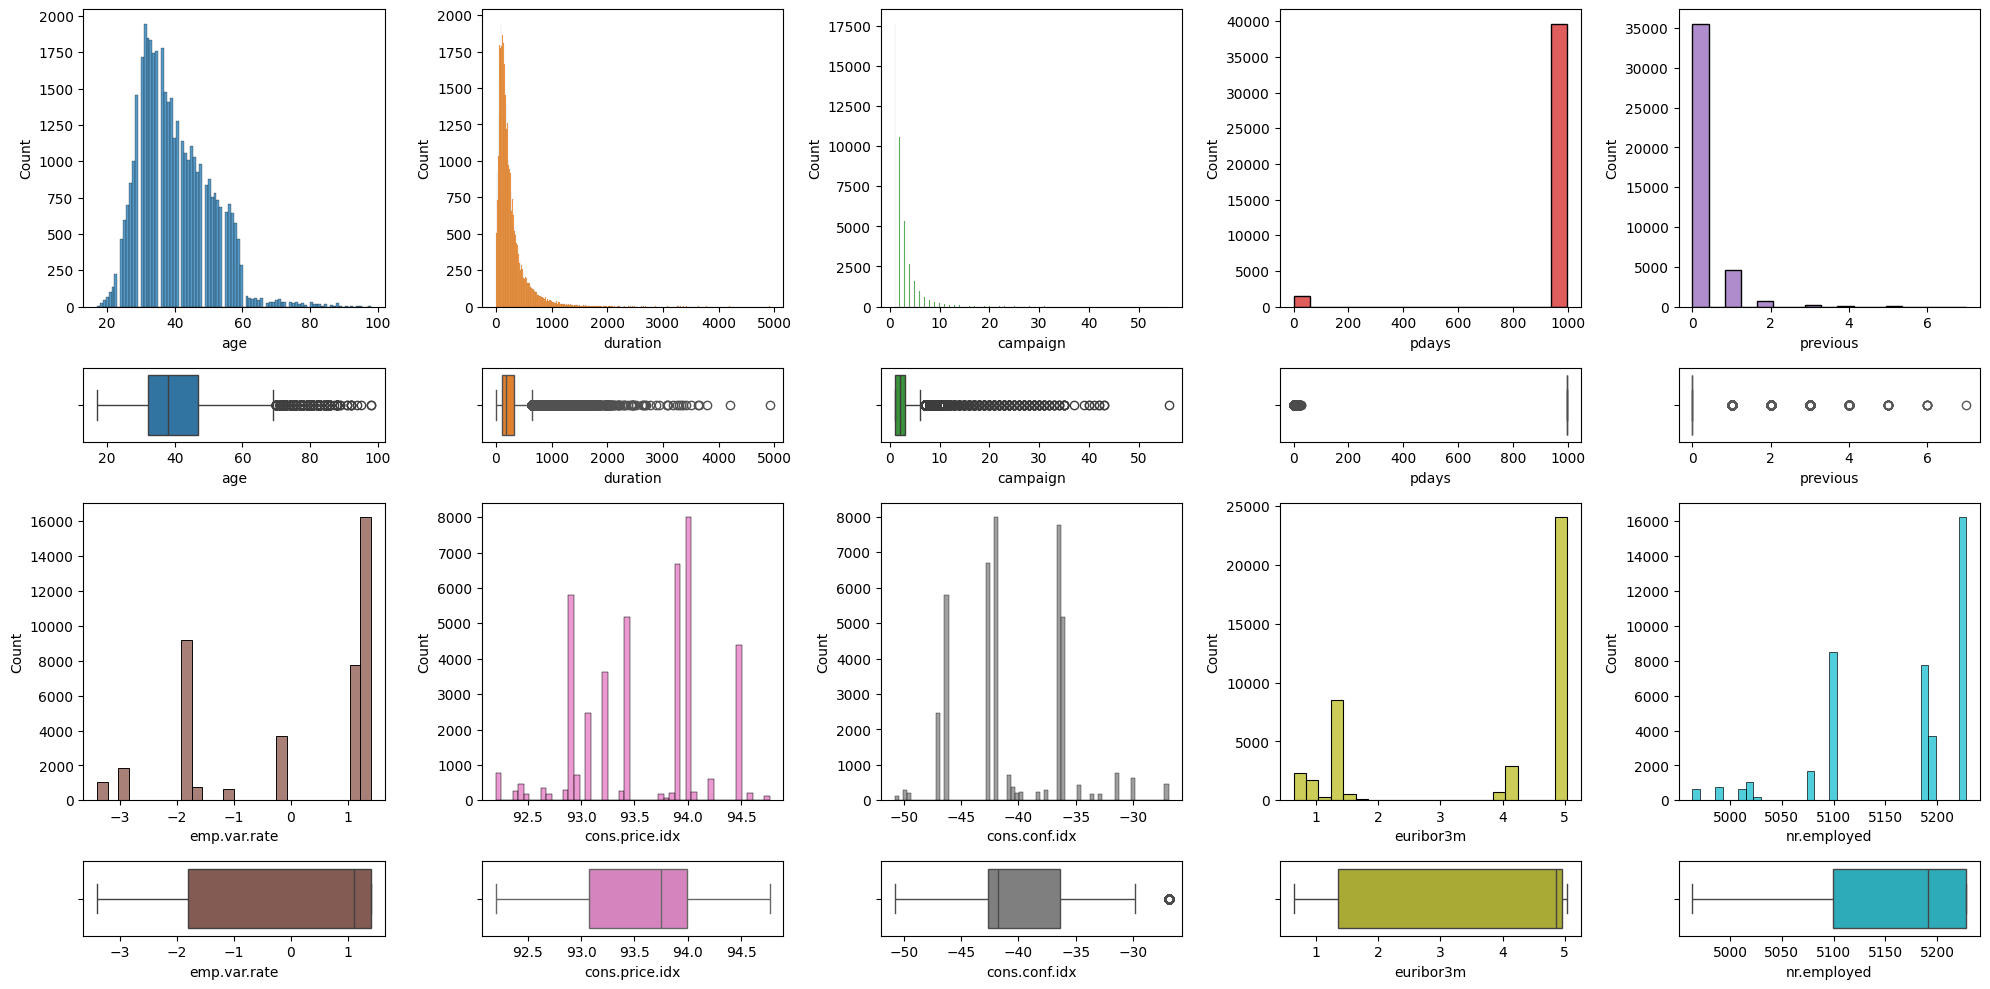

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette("tab10", 10)

fig, axis = plt.subplots(4, 5, figsize=(20, 10), gridspec_kw={"height_ratios": [16, 4, 16, 4]})

sns.histplot(ax=axis[0, 0], data=datos, x="age", color=colors[0])
sns.boxplot(ax=axis[1, 0], data=datos, x="age", color=colors[0])

sns.histplot(ax=axis[0, 1], data=datos, x="duration", color=colors[1])
sns.boxplot(ax=axis[1, 1], data=datos, x="duration", color=colors[1])

sns.histplot(ax=axis[0, 2], data=datos, x="campaign", color=colors[2])
sns.boxplot(ax=axis[1, 2], data=datos, x="campaign", color=colors[2])

sns.histplot(ax=axis[0, 3], data=datos, x="pdays", color=colors[3])
sns.boxplot(ax=axis[1, 3], data=datos, x="pdays", color=colors[3])

sns.histplot(ax=axis[0, 4], data=datos, x="previous", color=colors[4])
sns.boxplot(ax=axis[1, 4], data=datos, x="previous", color=colors[4])

sns.histplot(ax=axis[2, 0], data=datos, x="emp.var.rate", color=colors[5])
sns.boxplot(ax=axis[3, 0], data=datos, x="emp.var.rate", color=colors[5])

sns.histplot(ax=axis[2, 1], data=datos, x="cons.price.idx", color=colors[6])
sns.boxplot(ax=axis[3, 1], data=datos, x="cons.price.idx", color=colors[6])

sns.histplot(ax=axis[2, 2], data=datos, x="cons.conf.idx", color=colors[7])
sns.boxplot(ax=axis[3, 2], data=datos, x="cons.conf.idx", color=colors[7])

sns.histplot(ax=axis[2, 3], data=datos, x="euribor3m", color=colors[8])
sns.boxplot(ax=axis[3, 3], data=datos, x="euribor3m", color=colors[8])

sns.histplot(ax=axis[2, 4], data=datos, x="nr.employed", color=colors[9])
sns.boxplot(ax=axis[3, 4], data=datos, x="nr.employed", color=colors[9])

plt.tight_layout()

plt.show()


In [43]:
# Agrupamos dentro de la categoria de 'Age':
age_types = datos['nr.employed'].value_counts()
percent_age = (age_types / len(datos['nr.employed'])).round(3).sort_values(ascending = False) * 100
print(percent_age.head(100))

nr.employed
5228.1    39.4
5099.1    20.7
5191.0    18.8
5195.8     8.9
5076.2     4.0
5017.5     2.6
4991.6     1.9
5008.7     1.6
4963.6     1.5
5023.5     0.4
5176.3     0.0
Name: count, dtype: float64


<Axes: xlabel='y', ylabel='count'>

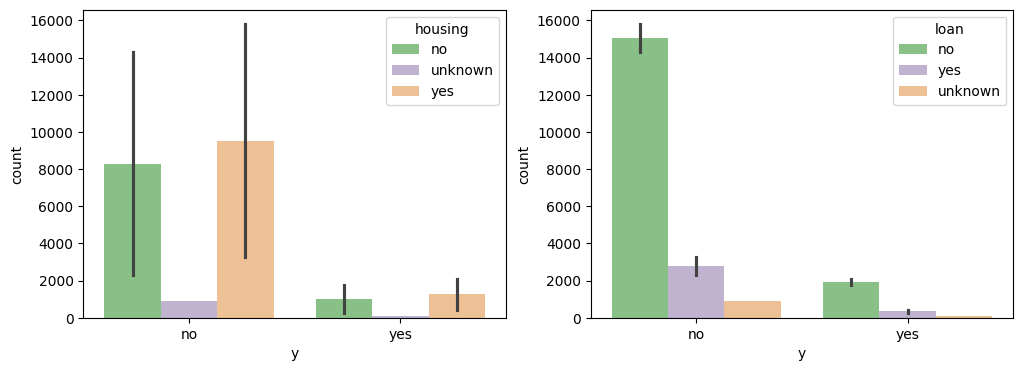

In [44]:

# seleccionamos las variables Categoricas: ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'y']

agg_total_data = datos.groupby(['y', 'housing', 'loan']).size().reset_index(name='count')

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.barplot(x='y', y='count', hue='housing', data=agg_total_data, palette='Accent',ax=axes[0],)
sns.barplot(x='y', y='count', hue='loan', data=agg_total_data, palette='Accent',ax=axes[1])

In [60]:
fact_data["job"] = pd.factorize(fact_data["job"])[0]
fact_data["marital"] = pd.factorize(fact_data["marital"])[0]
fact_data["default"] = pd.factorize(fact_data["default"])[0]
fact_data["housing"] = pd.factorize(fact_data["housing"])[0]
fact_data["loan"] = pd.factorize(fact_data["loan"])[0]
fact_data["contact"] = pd.factorize(fact_data["contact"])[0]
fact_data["month"] = pd.factorize(fact_data["month"])[0]
fact_data["poutcome"] = pd.factorize(fact_data["poutcome"])[0]
fact_data["y"] = pd.factorize(fact_data["y"])[0]

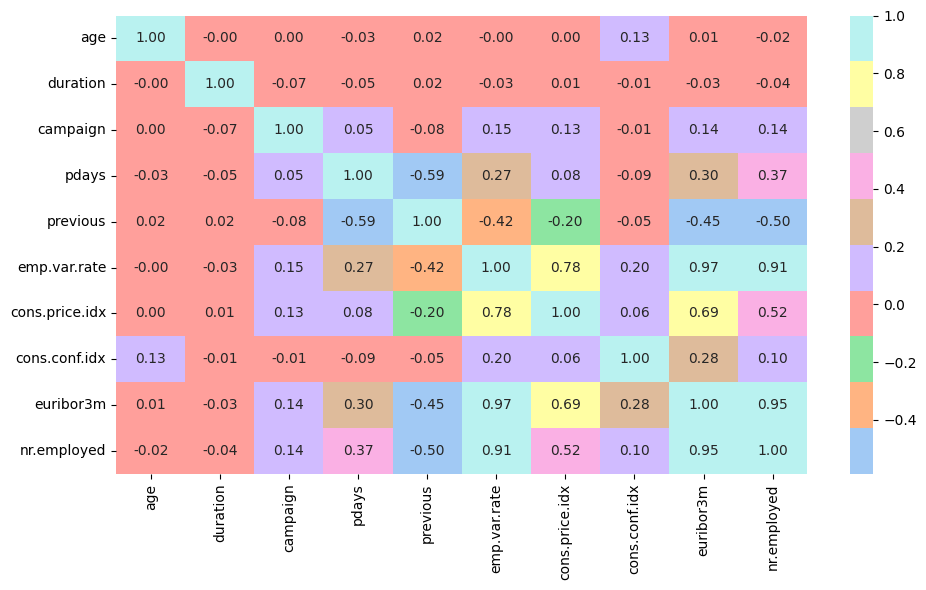

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

pastel_palette = sns.color_palette("pastel")

fig, axis = plt.subplots(figsize=(10, 6))

sns.heatmap(datos[Variable_numericas].corr(), annot=True, fmt='.2f', cmap=pastel_palette, ax=axis)

plt.tight_layout()

plt.show()


In [46]:
fact_data = datos.copy()
fact_data.head()

,age,job,marital,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,no,no,no,telephone,may,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,unknown,no,no,telephone,may,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,no,yes,no,telephone,may,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,no,no,no,telephone,may,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,no,no,yes,telephone,may,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [47]:

fact_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


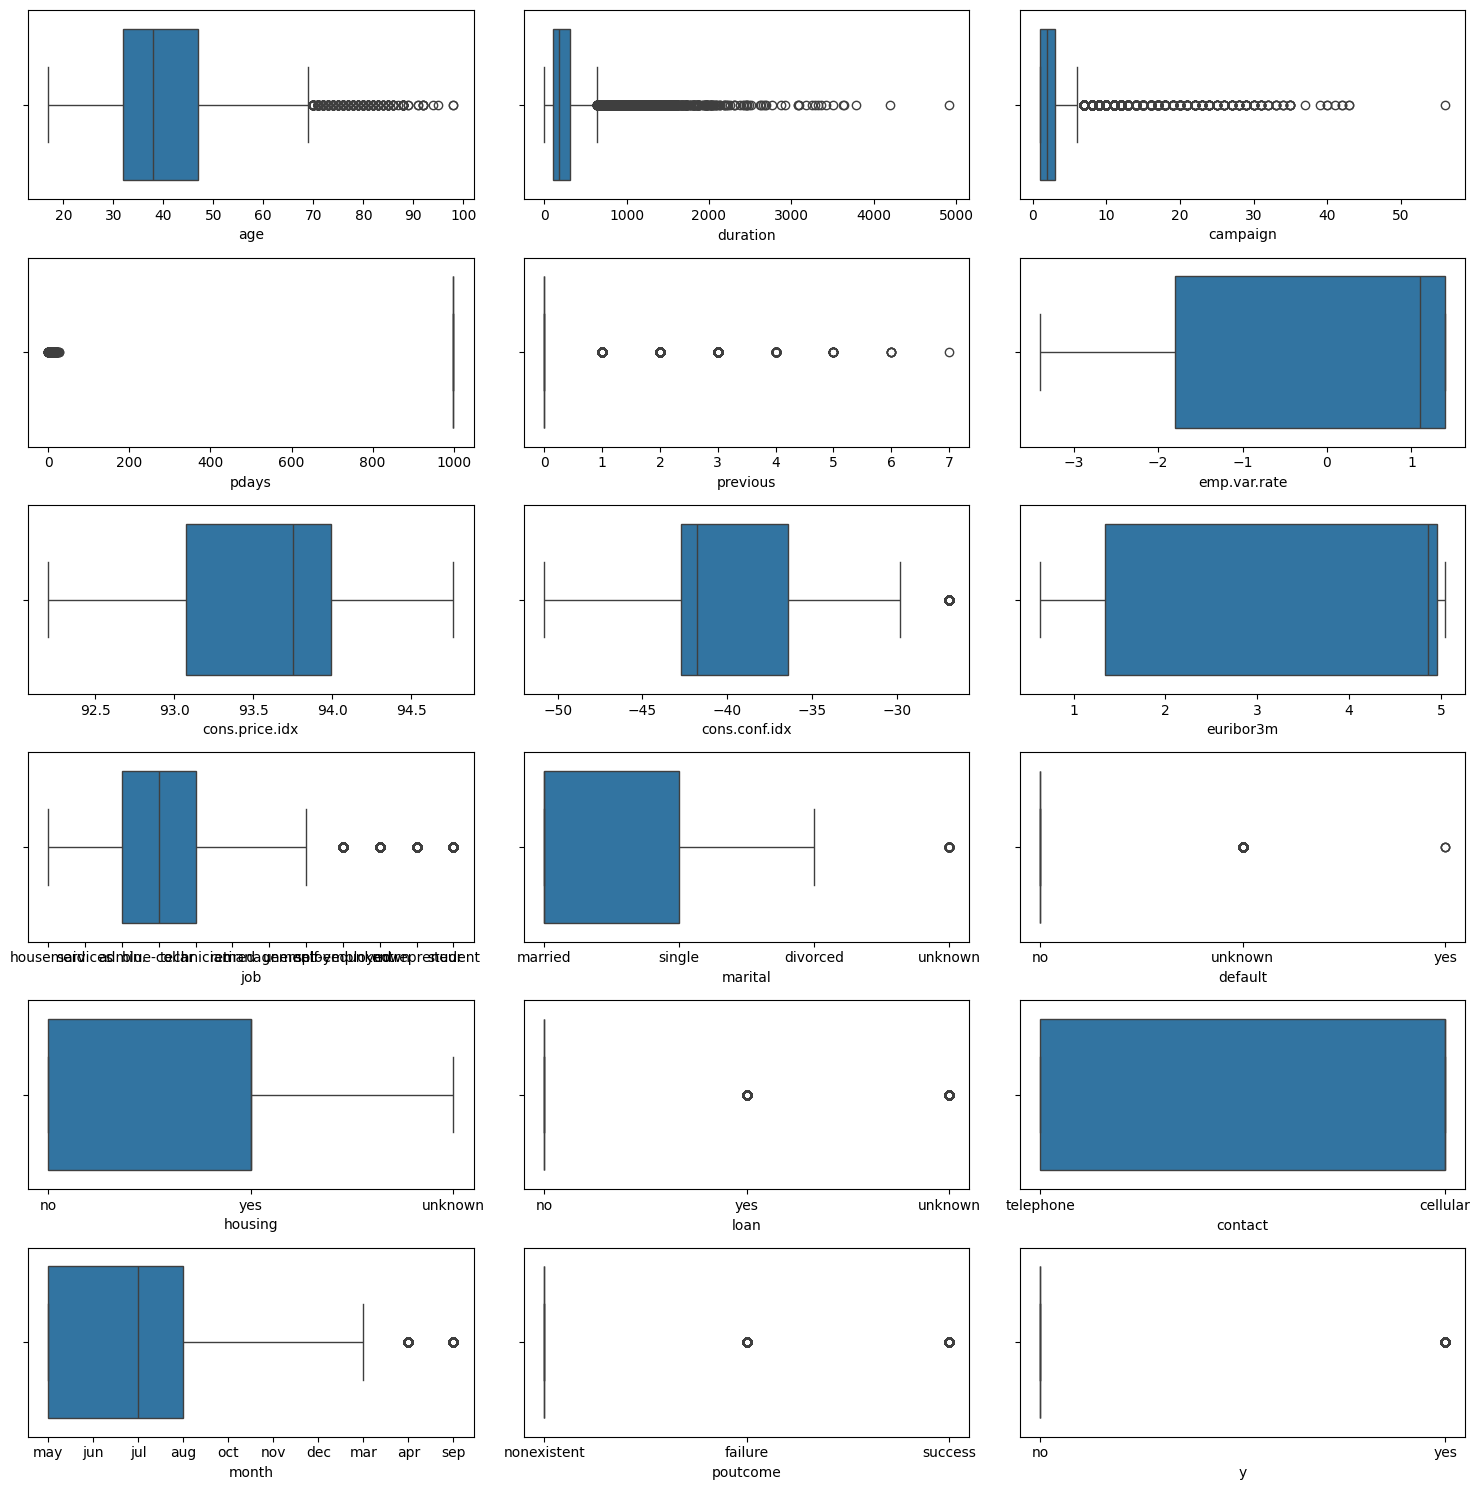

In [48]:
fig, axis = plt.subplots(6, 3, figsize=(15,15))

sns.boxplot(ax=axis[0,0], data=fact_data, x = 'age')
sns.boxplot(ax=axis[0,1], data=fact_data, x = 'duration')
sns.boxplot(ax=axis[0,2], data=fact_data, x = 'campaign')
sns.boxplot(ax=axis[1,0], data=fact_data, x = 'pdays')
sns.boxplot(ax=axis[1,1], data=fact_data, x = 'previous')
sns.boxplot(ax=axis[1,2], data=fact_data, x = 'emp.var.rate')
sns.boxplot(ax=axis[2,0], data=fact_data, x = 'cons.price.idx')
sns.boxplot(ax=axis[2,1], data=fact_data, x = 'cons.conf.idx')
sns.boxplot(ax=axis[2,2], data=fact_data, x = 'euribor3m')
sns.boxplot(ax=axis[3,0], data=fact_data, x = 'job')
sns.boxplot(ax=axis[3,1], data=fact_data, x = 'marital')
sns.boxplot(ax=axis[3,2], data=fact_data, x = 'default')
sns.boxplot(ax=axis[4,0], data=fact_data, x = 'housing')
sns.boxplot(ax=axis[4,1], data=fact_data, x = 'loan')
sns.boxplot(ax=axis[4,2], data=fact_data, x = 'contact')
sns.boxplot(ax=axis[5,0], data=fact_data, x = 'month')
sns.boxplot(ax=axis[5,1], data=fact_data, x='poutcome')
sns.boxplot(ax=axis[5,2], data=fact_data, x = 'y')

plt.tight_layout()

plt.show()

In [49]:
age_stats = datos['age'].describe()
print(age_stats)

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64


In [50]:
age_iqr = age_stats['75%'] - age_stats['25%']
upper_limit = age_stats['75%'] + 1.5 * age_iqr
lower_limit = age_stats['25%'] - 1.5 * age_iqr

print(f"El limite superior es{round(upper_limit, 2)} y el limite inferior es  {round(lower_limit, 2)}, con un rango intercuartílico de {round(age_iqr, 2)}")

El limite superior es69.5 y el limite inferior es  9.5, con un rango intercuartílico de 15.0


In [51]:

duration_stats = datos['duration'].describe()
print(duration_stats)

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64


In [52]:
duration_iqr = duration_stats['75%'] - duration_stats['25%']
upper_limit = duration_stats['75%'] + 1.5 * duration_iqr
lower_limit = duration_stats['25%'] - 1.5 * duration_iqr

print(f" El limite superior es {round(upper_limit, 2)} y el limite inferior es {round(lower_limit, 2)}, con un rango intercuartílico de  {round(duration_iqr, 2)}")

 El limite superior es 644.5 y el limite inferior es -223.5, con un rango intercuartílico de  217.0


In [53]:
campaign_stats = datos['campaign'].describe()
print(campaign_stats)

count    41188.000000
mean         2.567593
std          2.770014
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64


In [54]:
campaign_iqr = campaign_stats['75%'] - campaign_stats['25%']
upper_limit = campaign_stats['75%'] + 1.5 * campaign_iqr
lower_limit = campaign_stats['25%'] - 1.5 * campaign_iqr

print(f"El limite superior es {round(upper_limit, 2)} y el limite inferior es {round(lower_limit, 2)}, con un rango intercuartílico de {round(campaign_iqr, 2)}")

El limite superior es 6.0 y el limite inferior es -2.0, con un rango intercuartílico de 2.0


In [55]:
datos = datos[datos["campaign"] <= 15]

In [56]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# List of numerical variables only
num_variables = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Assume fact_data is already defined and loaded
scaler = MinMaxScaler()
scal_features = scaler.fit_transform(fact_data[num_variables])
fact_data_scal = pd.DataFrame(scal_features, index=fact_data.index, columns=num_variables)
fact_data_scal.head()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.481481,0.053070,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
1,0.493827,0.030297,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
2,0.246914,0.045954,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
3,0.283951,0.030704,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
4,0.481481,0.062424,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735


In [64]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split
import pandas as pd

# Asegúrate de que fact_data tenga la columna 'y'
y = fact_data['y']

# Solo escala las variables numéricas
num_variables = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(fact_data[num_variables])
fact_data_scal = pd.DataFrame(scal_features, index=fact_data.index, columns=num_variables)

# Añadir de nuevo la columna 'y' al DataFrame escalado
fact_data_scal['y'] = y

# Divide the dataset into training and test samples
X = fact_data_scal.drop('y', axis=1)
y = fact_data_scal['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KBest Selection for the best Features
selection_model = SelectKBest(chi2, k=5)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=X_test.columns.values[ix])

X_train_sel.head()


,duration,previous,emp.var.rate,euribor3m,nr.employed
0,0.019113,0.000000,1.000000,0.980730,1.000000
1,0.023587,0.000000,0.333333,0.138291,0.512287
2,0.002643,0.142857,0.333333,0.163228,0.512287
3,0.019113,0.000000,1.000000,0.980957,1.000000
4,0.069947,0.000000,0.937500,0.958059,0.859735


In [65]:
X_train_sel['y'] = list(y_train)
X_test_sel['y'] = list(y_test)
X_train_sel.to_csv('/workspaces/ML/data/processed/clean_train-bankmkt.csv', index=False)
X_test_sel.to_csv('/workspaces/ML/data/processed/clean_test-bankmkt.csv', index=False)

In [66]:
# Import cleanned data:

train_data = pd.read_csv('/workspaces/ML/data/processed/clean_train-bankmkt.csv')
test_data = pd.read_csv('/workspaces/ML/data/processed/clean_test-bankmkt.csv')

train_data.head()

,duration,previous,emp.var.rate,euribor3m,nr.employed,y
0,0.019113,0.000000,1.000000,0.980730,1.000000,0
1,0.023587,0.000000,0.333333,0.138291,0.512287,0
2,0.002643,0.142857,0.333333,0.163228,0.512287,0
3,0.019113,0.000000,1.000000,0.980957,1.000000,0
4,0.069947,0.000000,0.937500,0.958059,0.859735,0


In [67]:
X_train = train_data.drop(["y"], axis = 1)
y_train = train_data["y"]
X_test = test_data.drop(["y"], axis = 1)
y_test = test_data["y"]

In [68]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [69]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [70]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9038601602330663

Tenemos una precisión de 0,90 es muy cercano a 1,0 por lo tanto este modelo es perfectamente valido